# importing laibraries and loading dataset


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score

In [2]:
df = pd.read_csv("/content/actiavation_Aug_Oct2023.csv")

In [3]:
df.head()

,CO_ID,USER_CREATED_BY,MSISDN,POS_MSISDN,DISTRIBUTER,Plan_Name,ACTIVE_DATE,DEACTIVE_DATE,Customer Tenure,Tenure Category,STATUS,Status Reason,SEGMENT1,SEGMENT2,Churn Flag,Customer Interaction Score,Loyalty Points,Data Usage Tier,Customer Segment Change Flag
0,31154967,BJNN1810,891476116,ORG3448,BL-NVTBTBXFRB BL-LB NVTBNBHFZB (LJNJTLFTT JNTF...,Basic Orange Plan,2023-10-05,NaN,88,NaN,Hard Suspended,Violation of terms,Prepaid,Residential,1,3,48,Low,1
1,31719208,TTP.PNBR.BLTHBLHBNBF,891433210,NaN,FJFLDTBLFT,Governorates 10,2023-09-28,NaN,95,Medium-term,Active,NaN,Postpaid,PRO,1,7,65,High,1
2,30566993,BJNN1810,882740023,NaN,FRBNDHJTF - TBFFXBZ 7TH DJRDLF,Family Orange Plan 10,2023-09-19,NaN,104,Medium-term,Active,NaN,Prepaid,PRO,1,6,65,Medium,1
3,31654015,DPNB1876,529853159,NaN,FNTFRPRJTF TBLFT TTPDL,Orange 90,2023-09-13,2023-10-22,39,Short-term,Deactive,Service Quality,Postpaid,Corporate,1,9,73,NaN,1
4,31237322,DPNB1876,883224490,NaN,FNTFRPRJTF TBLFT TTPDL,Orange 60,2023-08-10,2023-08-28,18,Short-term,Deactive,Lack of Usage,Postpaid,Corporate,1,5,10,NaN,1


# cleaning data + converting to numerical data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30224 entries, 0 to 30223
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   CO_ID                         30224 non-null  int64 
 1   USER_CREATED_BY               30123 non-null  object
 2   MSISDN                        30224 non-null  int64 
 3   POS_MSISDN                    10653 non-null  object
 4   DISTRIBUTER                   28419 non-null  object
 5   Plan_Name                     30224 non-null  object
 6   ACTIVE_DATE                   30224 non-null  object
 7   DEACTIVE_DATE                 10156 non-null  object
 8   Customer Tenure               30224 non-null  int64 
 9   Tenure Category               29929 non-null  object
 10  STATUS                        30224 non-null  object
 11  Status Reason                 21064 non-null  object
 12  SEGMENT1                      30224 non-null  object
 13  SEGMENT2        

In [5]:
#null values in each column
df.isnull().sum()

CO_ID                               0
USER_CREATED_BY                   101
MSISDN                              0
POS_MSISDN                      19571
DISTRIBUTER                      1805
Plan_Name                           0
ACTIVE_DATE                         0
DEACTIVE_DATE                   20068
Customer Tenure                     0
Tenure Category                   295
STATUS                              0
Status Reason                    9160
SEGMENT1                            0
SEGMENT2                            0
Churn Flag                          0
Customer Interaction Score          0
Loyalty Points                      0
Data Usage Tier                  6644
Customer Segment Change Flag        0
dtype: int64

In [6]:
#duplicated row
duplicate_rows = df[df.duplicated()]

In [7]:
#dropping dublicated rows
df.drop_duplicates(inplace=True)

In [8]:
df['SEGMENT1'].unique()

array(['Prepaid', 'Postpaid', 'Prepaid100', 'Pre400paid', '5Prepaid',
       '5Postpaid', 'Post60paid', 'Postpaid300'], dtype=object)

In [9]:
df['SEGMENT2'].unique()

array(['Residential', 'PRO', 'Corporate'], dtype=object)

In [10]:
df['Data Usage Tier'].unique()

array(['Low', 'High', 'Medium', nan, 'medium'], dtype=object)

In [11]:
df['Data Usage Tier'] = df['Data Usage Tier'].str.lower()

In [12]:
# droppiing the 100 null values in USER_CREATED_BY
df.dropna(subset=['USER_CREATED_BY'], inplace=True)

In [13]:
#dropping POS_MSISDN, 19122 null vlues + the column DISTRIBUTER gives the same information
df.drop('POS_MSISDN', axis = 1, inplace = True)

In [14]:
#dropping deactivate date
df.drop('DEACTIVE_DATE', axis = 1, inplace = True)

In [15]:
#getting the values of nulls
df['DISTRIBUTER'].isnull().sum()

1771

In [16]:
# droppiing the 1771 null values in DISTRIBUTER
df.dropna(subset=['DISTRIBUTER'], inplace=True)

In [17]:
df.isnull().sum()

CO_ID                              0
USER_CREATED_BY                    0
MSISDN                             0
DISTRIBUTER                        0
Plan_Name                          0
ACTIVE_DATE                        0
Customer Tenure                    0
Tenure Category                  290
STATUS                             0
Status Reason                   7206
SEGMENT1                           0
SEGMENT2                           0
Churn Flag                         0
Customer Interaction Score         0
Loyalty Points                     0
Data Usage Tier                 6574
Customer Segment Change Flag       0
dtype: int64

In [18]:
# activate date
df['ACTIVE_DATE'] = pd.to_datetime(df['ACTIVE_DATE'])

standard_date_formats = df['ACTIVE_DATE'].dt.strftime('%Y-%m-%d').unique()
print(standard_date_formats)

ACTIVE_DATE_counts = df['ACTIVE_DATE'].value_counts().sum()
ACTIVE_DATE_counts
# no null valaues

['2023-10-05' '2023-09-28' '2023-09-19' '2023-09-13' '2023-08-10'
 '2023-08-28' '2023-09-22' '2023-08-03' '2023-08-09' '2023-10-09'
 '2023-09-12' '2023-10-23' '2023-08-29' '2023-10-28' '2023-08-15'
 '2023-10-26' '2023-10-15' '2023-09-21' '2023-08-19' '2023-10-16'
 '2023-08-16' '2023-08-06' '2023-10-20' '2023-10-10' '2023-10-19'
 '2023-10-11' '2023-10-31' '2023-08-27' '2023-10-30' '2023-08-05'
 '2023-10-29' '2023-09-30' '2023-10-02' '2023-09-03' '2023-09-14'
 '2023-10-08' '2023-08-02' '2023-08-18' '2023-09-05' '2023-09-07'
 '2023-08-13' '2023-09-08' '2023-10-24' '2023-09-18' '2023-10-06'
 '2023-08-20' '2023-10-25' '2023-09-25' '2023-08-24' '2023-08-21'
 '2023-09-29' '2023-08-14' '2023-08-12' '2023-08-26' '2023-10-17'
 '2023-10-04' '2023-08-08' '2023-09-01' '2023-08-07' '2023-08-01'
 '2023-10-01' '2023-09-06' '2023-08-30' '2023-10-14' '2023-09-11'
 '2023-09-10' '2023-10-03' '2023-10-13' '2023-09-20' '2023-08-25'
 '2023-10-12' '2023-09-02' '2023-10-18' '2023-08-17' '2023-10-22'
 '2023-09-

27922

# **Tenure Category**

In [19]:
#Customer Tenure: Duration between activation and deactivation/current date.
df['Customer Tenure'].unique()

array([ 88,  95, 104,  39,  18, 126, 101, 151, 145,  84,  40,  20, 125,
        65, 139,   4,  16, 102, 135,  77, 138,  27,  83,  74,  82,  62,
       127,  63,  64,  93,  91,  73, 120,  17, 110, 109,  85, 148, 152,
       136, 118, 116, 141, 115,  19,  69, 105,  87, 134,  68,  98,  59,
       133,  94, 140, 100, 142, 130, 128,   6,  76,  15,  41,  89, 146,
        38, 111, 122, 147,  78, 153,  11,  92, 117, 124,   1,  79,  47,
       113,  90,  42,  13,  51,  80, 103,  22, 129,  81,  50,   7,  70,
       121,  12, 137,   3, 149,  37,  21,  71, 114,  97,  30,  96, 119,
        31,  99,  75, 108,  23,  53, 112, 123, 144,  32,  86,  34,  44,
        67,   9,  36,  35,  72, 106,  52,  25,  60, 143,  57,  10, 131,
       150,  61,   8,  54, 107,   2, 132,  26,   5,  56,  29,  14,  66,
        43,  49,  48,  24,  45,  28,  33,   0,  55,  58,  46])

In [20]:
df['Customer Tenure'].max()

153

In [21]:
# Tenure Category
unique_tenure_cate = df['Tenure Category'].unique()
print(unique_tenure_cate)

mapping_to_have_unique_values = {
    'Medium-term': 'Medium',
    'Short-term': 'Short',
    'Long-term': 'Long'
}
df['Tenure Category'] = df['Tenure Category'].replace(mapping_to_have_unique_values)

[nan 'Medium-term' 'Short-term' 'Long-term' 'Medium' 'Short' 'Long']


In [22]:
unique_tenure_cate = df['Tenure Category'].unique()
print(unique_tenure_cate)

[nan 'Medium' 'Short' 'Long']


In [23]:
short_term_threshold = 50
long_term_threshold = 100

# Function to categorize tenure based on thresholds
def categorize_tenure(tenure):
    if tenure < short_term_threshold:
        return 'Short'
    elif tenure >= long_term_threshold:
        return 'Long'
    else:
        return 'Medium'

# Fill NaN values in 'Tenure Category' based on 'Customer Tenure'
df['Tenure Category'] = df.apply(lambda row: categorize_tenure(row['Customer Tenure']) if pd.isnull(row['Tenure Category']) else row['Tenure Category'], axis=1)


# **STATUS**

In [24]:
# STATUS
unique_values_Status = df['STATUS'].unique()
unique_values_Status

array(['Hard Suspended', 'Active', 'Deactive', 'Soft Suspended',
       'Hard suspended', 'Soft suspended'], dtype=object)

In [25]:
df['STATUS'] = df['STATUS'].str.lower()

In [26]:
unique_values_Status = df['STATUS'].unique()
unique_values_Status

array(['hard suspended', 'active', 'deactive', 'soft suspended'],
      dtype=object)

In [27]:
null_status_reason = df[df['Status Reason'].isnull()]

# Display the 'STATUS' and 'Status Reason' columns for these rows
print(null_status_reason[['STATUS', 'Status Reason']])

       STATUS Status Reason
1      active           NaN
2      active           NaN
5      active           NaN
13     active           NaN
14     active           NaN
...       ...           ...
29980  active           NaN
29983  active           NaN
29991  active           NaN
29995  active           NaN
29999  active           NaN

[7206 rows x 2 columns]


In [28]:
# Filter rows where 'Status Reason' is null
null_status_reason = df[df['Status Reason'].isnull()]

# Check unique values in the STATUS
unique_statuses = null_status_reason['STATUS'].unique()


if len(unique_statuses) == 1 and unique_statuses[0] == 'active':
    print("All corresponding 'Status Reason' values for null values are 'active'.")
else:
    print("Not all corresponding 'Status Reason' values for null values are 'active'.")

All corresponding 'Status Reason' values for null values are 'active'.


In [29]:
df['Status Reason'].unique()

array(['Violation of terms', nan, 'Service Quality', 'Lack of Usage',
       'Service upgrade', 'Illegal usage', 'Non-payment',
       'Technical Difficulties', 'Moved', 'Price', 'Billing Issues',
       'Personal Reasons', 'Document verification', 'Fraudulent activity',
       'Customer request', 'Network Issues', 'Technical issue',
       'Better Offer Elsewhere', 'Contract Ended'], dtype=object)

In [30]:
df.loc[df['STATUS'] == 'active', 'Status Reason'] = 'Active'

In [31]:
df['Status Reason'].isnull().sum()

0

In [32]:
df.isnull().sum()

CO_ID                              0
USER_CREATED_BY                    0
MSISDN                             0
DISTRIBUTER                        0
Plan_Name                          0
ACTIVE_DATE                        0
Customer Tenure                    0
Tenure Category                    0
STATUS                             0
Status Reason                      0
SEGMENT1                           0
SEGMENT2                           0
Churn Flag                         0
Customer Interaction Score         0
Loyalty Points                     0
Data Usage Tier                 6574
Customer Segment Change Flag       0
dtype: int64

In [33]:
df.isnull().sum()

CO_ID                              0
USER_CREATED_BY                    0
MSISDN                             0
DISTRIBUTER                        0
Plan_Name                          0
ACTIVE_DATE                        0
Customer Tenure                    0
Tenure Category                    0
STATUS                             0
Status Reason                      0
SEGMENT1                           0
SEGMENT2                           0
Churn Flag                         0
Customer Interaction Score         0
Loyalty Points                     0
Data Usage Tier                 6574
Customer Segment Change Flag       0
dtype: int64

# **data usage tier**

In [34]:
df['Data Usage Tier'].unique()

array(['low', 'high', 'medium', nan], dtype=object)

In [35]:
df['Data Usage Tier'].isnull().sum()

6574

In [36]:
# Count the frequency of each category in 'Data Usage Tier'
usage_tier_counts = df['Data Usage Tier'].value_counts()

print(usage_tier_counts)

low       10669
high       7204
medium     3475
Name: Data Usage Tier, dtype: int64


In [37]:
df['Customer Interaction Score'].unique()

array([ 3,  7,  6,  9,  5, 10,  8,  1,  2,  4])

In [38]:
# Group by 'Data Usage Tier' and find the min and max loyalty points
Customer_Interaction_Score_range = df.groupby('Data Usage Tier')['Customer Interaction Score'].agg(['min', 'max'])

print(Customer_Interaction_Score_range)

                 min  max
Data Usage Tier          
high               1   10
low                1   10
medium             1   10


In [39]:
# Group by 'Customer Interaction Score' and find the most common 'Data Usage Tier' value
usage_tier_imputation = df.groupby('Customer Interaction Score')['Data Usage Tier'].agg(lambda x: x.value_counts().index[0])
print(usage_tier_imputation)

Customer Interaction Score
1      low
2      low
3      low
4      low
5     high
6     high
7     high
8     high
9      low
10     low
Name: Data Usage Tier, dtype: object


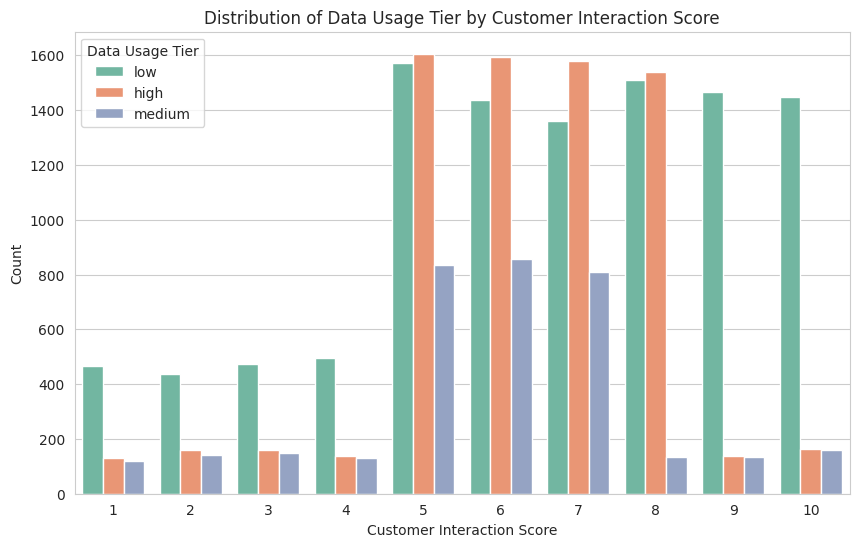

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set_style("whitegrid")

# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Customer Interaction Score', hue='Data Usage Tier', palette='Set2')
plt.title('Distribution of Data Usage Tier by Customer Interaction Score')
plt.xlabel('Customer Interaction Score')
plt.ylabel('Count')
plt.legend(title='Data Usage Tier')
plt.show()


In [41]:
# Function to fill null values in 'Data Usage Tier' based on 'Customer Interaction Score'
def fill_null_usage_tier(row):
    if pd.isnull(row['Data Usage Tier']):
        return usage_tier_imputation[row['Customer Interaction Score']]
    else:
        return row['Data Usage Tier']

In [42]:
# Apply the function to fill null values
df['Data Usage Tier'] = df.apply(fill_null_usage_tier, axis=1)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27922 entries, 0 to 30007
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   CO_ID                         27922 non-null  int64         
 1   USER_CREATED_BY               27922 non-null  object        
 2   MSISDN                        27922 non-null  int64         
 3   DISTRIBUTER                   27922 non-null  object        
 4   Plan_Name                     27922 non-null  object        
 5   ACTIVE_DATE                   27922 non-null  datetime64[ns]
 6   Customer Tenure               27922 non-null  int64         
 7   Tenure Category               27922 non-null  object        
 8   STATUS                        27922 non-null  object        
 9   Status Reason                 27922 non-null  object        
 10  SEGMENT1                      27922 non-null  object        
 11  SEGMENT2                    

In [44]:
df.isnull().sum()

CO_ID                           0
USER_CREATED_BY                 0
MSISDN                          0
DISTRIBUTER                     0
Plan_Name                       0
ACTIVE_DATE                     0
Customer Tenure                 0
Tenure Category                 0
STATUS                          0
Status Reason                   0
SEGMENT1                        0
SEGMENT2                        0
Churn Flag                      0
Customer Interaction Score      0
Loyalty Points                  0
Data Usage Tier                 0
Customer Segment Change Flag    0
dtype: int64

# **converting **

In [45]:
# to get the relationship with corr
label_encoder = LabelEncoder()
df['Status Reason'] = label_encoder.fit_transform(df['Status Reason'])
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)

df['Data Usage Tier'] = label_encoder.fit_transform(df['Data Usage Tier'])
df['SEGMENT1'] = label_encoder.fit_transform(df['SEGMENT1'])
df['USER_CREATED_BY'] = label_encoder.fit_transform(df['USER_CREATED_BY'])
df['DISTRIBUTER'] = label_encoder.fit_transform(df['DISTRIBUTER'])
df['Plan_Name'] = label_encoder.fit_transform(df['Plan_Name'])
df['Tenure Category'] = label_encoder.fit_transform(df['Tenure Category'])
df['STATUS'] = label_encoder.fit_transform(df['STATUS'])
df['Status Reason'] = label_encoder.fit_transform(df['Status Reason'])
df['SEGMENT2'] = label_encoder.fit_transform(df['SEGMENT2'])

Label Mapping: {'Active': 0, 'Better Offer Elsewhere': 1, 'Billing Issues': 2, 'Contract Ended': 3, 'Customer request': 4, 'Document verification': 5, 'Fraudulent activity': 6, 'Illegal usage': 7, 'Lack of Usage': 8, 'Moved': 9, 'Network Issues': 10, 'Non-payment': 11, 'Personal Reasons': 12, 'Price': 13, 'Service Quality': 14, 'Service upgrade': 15, 'Technical Difficulties': 16, 'Technical issue': 17, 'Violation of terms': 18}


In [46]:
df.corr()

<ipython-input-46-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,CO_ID,USER_CREATED_BY,MSISDN,DISTRIBUTER,Plan_Name,Customer Tenure,Tenure Category,STATUS,Status Reason,SEGMENT1,SEGMENT2,Churn Flag,Customer Interaction Score,Loyalty Points,Data Usage Tier,Customer Segment Change Flag
CO_ID,1.000000,0.298628,-0.269884,0.026985,0.019634,-0.421201,0.382901,-0.345499,-0.137709,-0.422195,-0.378896,0.281336,-0.068850,-0.090820,-0.116567,-0.002611
USER_CREATED_BY,0.298628,1.000000,0.124938,0.042307,0.089975,-0.178290,0.149909,-0.412837,-0.240009,-0.557186,-0.030229,0.132785,-0.055152,0.037512,-0.211241,-0.008274
MSISDN,-0.269884,0.124938,1.000000,0.197660,-0.150993,0.356237,-0.342551,0.192487,-0.018109,0.565556,0.705879,-0.414200,0.075389,0.125617,-0.017131,-0.002241
DISTRIBUTER,0.026985,0.042307,0.197660,1.000000,-0.061458,-0.098610,0.033491,-0.013854,-0.008497,0.117748,0.145636,0.033391,0.016760,0.001777,-0.005076,0.006008
Plan_Name,0.019634,0.089975,-0.150993,-0.061458,1.000000,0.039761,0.014011,-0.102758,-0.036539,-0.126688,0.037718,0.035274,-0.031879,0.001784,-0.042993,0.001648
Customer Tenure,-0.421201,-0.178290,0.356237,-0.098610,0.039761,1.000000,-0.893602,0.275966,-0.090545,0.393923,0.393048,-0.739153,0.132699,0.418981,-0.082707,0.006843
Tenure Category,0.382901,0.149909,-0.342551,0.033491,0.014011,-0.893602,1.000000,-0.287346,0.017134,-0.368766,-0.349346,0.561741,-0.110883,-0.427939,0.017688,-0.007287
STATUS,-0.345499,-0.412837,0.192487,-0.013854,-0.102758,0.275966,-0.287346,1.000000,0.571101,0.473351,0.346342,-0.200298,0.199658,-0.076568,0.497667,0.000997
Status Reason,-0.137709,-0.240009,-0.018109,-0.008497,-0.036539,-0.090545,0.017134,0.571101,1.000000,0.177847,0.115474,0.189415,0.004614,-0.215511,0.420364,-0.002863
SEGMENT1,-0.422195,-0.557186,0.565556,0.117748,-0.126688,0.393923,-0.368766,0.473351,0.177847,1.000000,0.541823,-0.412604,0.098817,0.062436,0.154811,0.010219


In [47]:
df['ACTIVE_YEAR'] = df['ACTIVE_DATE'].dt.year # drop - 2monthes + adding weeks
df['ACTIVE_MONTH'] = df['ACTIVE_DATE'].dt.month
df['ACTIVE_DAY'] = df['ACTIVE_DATE'].dt.day

In [48]:
df.drop('ACTIVE_DATE', axis = 1, inplace = True)

In [49]:
df.head()

,CO_ID,USER_CREATED_BY,MSISDN,DISTRIBUTER,Plan_Name,Customer Tenure,Tenure Category,STATUS,Status Reason,SEGMENT1,SEGMENT2,Churn Flag,Customer Interaction Score,Loyalty Points,Data Usage Tier,Customer Segment Change Flag,ACTIVE_YEAR,ACTIVE_MONTH,ACTIVE_DAY
0,31154967,15,891476116,15,0,88,1,2,18,6,2,1,3,48,1,1,2023,10,5
1,31719208,589,891433210,34,5,95,1,0,0,3,1,1,7,65,0,1,2023,9,28
2,30566993,15,882740023,47,3,104,1,0,0,6,1,1,6,65,2,1,2023,9,19
3,31654015,47,529853159,40,21,39,2,1,14,3,0,1,9,73,1,1,2023,9,13
4,31237322,47,883224490,40,18,18,2,1,8,3,0,1,5,10,0,1,2023,8,10


In [50]:
df['ACTIVE_YEAR'].unique()

array([2023])

In [51]:
df.drop('ACTIVE_YEAR', axis = 1, inplace = True)

# **std**

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27922 entries, 0 to 30007
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   CO_ID                         27922 non-null  int64
 1   USER_CREATED_BY               27922 non-null  int64
 2   MSISDN                        27922 non-null  int64
 3   DISTRIBUTER                   27922 non-null  int64
 4   Plan_Name                     27922 non-null  int64
 5   Customer Tenure               27922 non-null  int64
 6   Tenure Category               27922 non-null  int64
 7   STATUS                        27922 non-null  int64
 8   Status Reason                 27922 non-null  int64
 9   SEGMENT1                      27922 non-null  int64
 10  SEGMENT2                      27922 non-null  int64
 11  Churn Flag                    27922 non-null  int64
 12  Customer Interaction Score    27922 non-null  int64
 13  Loyalty Points                2

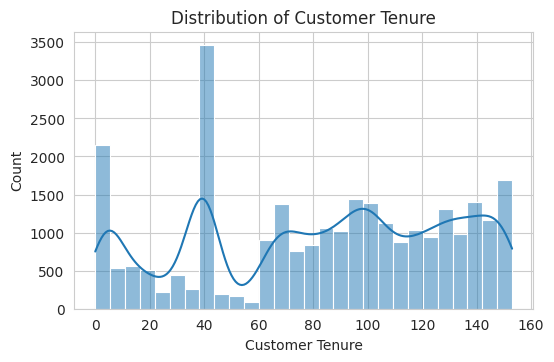

In [53]:
numerical_columns = ['Customer Tenure']

# Plotting the distribution of each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()

In [54]:
from sklearn.preprocessing import StandardScaler

# Selecting the columns for standardization
columns_to_standardize = ['Customer Tenure']

# Applying standardization to the specified columns in 'df'
scaler = StandardScaler()
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

# Displaying the first few rows of the DataFrame after standardization
df.head()

,CO_ID,USER_CREATED_BY,MSISDN,DISTRIBUTER,Plan_Name,Customer Tenure,Tenure Category,STATUS,Status Reason,SEGMENT1,SEGMENT2,Churn Flag,Customer Interaction Score,Loyalty Points,Data Usage Tier,Customer Segment Change Flag,ACTIVE_MONTH,ACTIVE_DAY
0,31154967,15,891476116,15,0,0.103512,1,2,18,6,2,1,3,48,1,1,10,5
1,31719208,589,891433210,34,5,0.256391,1,0,0,3,1,1,7,65,0,1,9,28
2,30566993,15,882740023,47,3,0.452950,1,0,0,6,1,1,6,65,2,1,9,19
3,31654015,47,529853159,40,21,-0.966640,2,1,14,3,0,1,9,73,1,1,9,13
4,31237322,47,883224490,40,18,-1.425277,2,1,8,3,0,1,5,10,0,1,8,10


<Axes: >

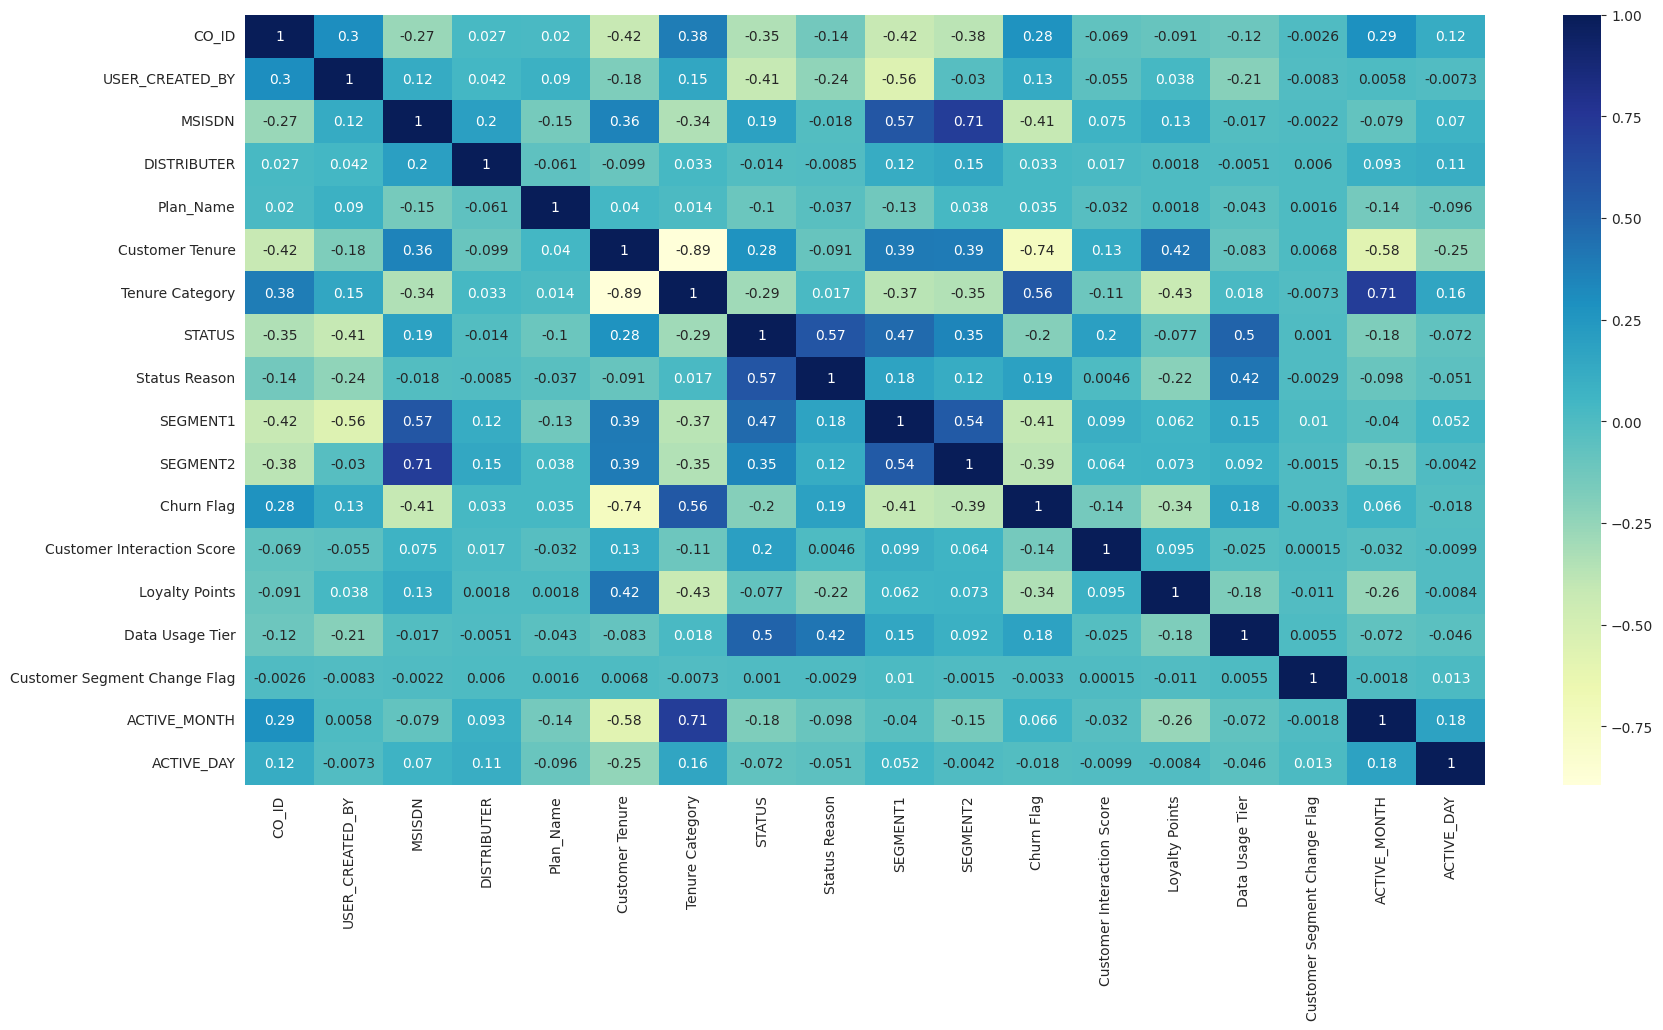

In [55]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

# **KNN**

In [56]:
X = df.drop(['SEGMENT1', 'SEGMENT2', 'STATUS'], axis=1)  # Features
y = df['SEGMENT1']           # Target variables

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Outputting the shape of the resulting datasets to confirm the split
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((19545, 16), (8377, 16), (19545,), (8377,))

In [74]:
from sklearn.neighbors import KNeighborsClassifier

knn1_accurecy = []
knn1_precision = []
knn1_recall = []
knn1_f1_score = []

for i in range(30):
  X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2,random_state = i)

  # Initializing the KNeighborsClassifier
  k=5
  knn = KNeighborsClassifier(n_neighbors=k)

  # Training the KNeighborsClassifier
  knn.fit(X_train, y_train)

  # After the model is trained, it can be used to make predictions

  y_pred = knn.predict(X_test)

    # importing accuracy_score
  from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
  # printing accuracy
  knn_accuracy = accuracy_score(y_test,y_pred)
  knn1_accurecy.append(knn_accuracy)
  print("Accuracy: ",accuracy_score(y_test,y_pred))
  # printing precision
  knn_precision = precision_score(y_test,y_pred,average='micro')
  knn1_precision.append(knn_precision)
  print("Precision: ",precision_score(y_test,y_pred,average='micro'))
  # printing recall
  knn_recall = recall_score(y_test,y_pred,average='micro')
  knn1_recall.append(knn_recall)
  print("Recall: ",recall_score(y_test,y_pred,average='micro'))
  # printing f1 score
  knn_f1_score = f1_score(y_test,y_pred,average='micro')
  knn1_f1_score.append(knn_f1_score)
  print("F1_score: ",f1_score(y_test,y_pred,average='micro'))
  print("*************************************************************************************")

def getAvg(measure):
  sum = 0
  for i in measure:
    sum += i
  return sum/30

print('=========================================================')
print('Average Accuracy:', getAvg(knn1_accurecy))
print('Average Recall:', getAvg(knn1_recall))
print('Average Precision:', getAvg(knn1_precision))
print('Average F1-Score:', getAvg(knn1_f1_score))

Accuracy:  0.9201432408236347
Precision:  0.9201432408236347
Recall:  0.9201432408236347
F1_score:  0.9201432408236347
*************************************************************************************
Accuracy:  0.9187108325872874
Precision:  0.9187108325872874
Recall:  0.9187108325872874
F1_score:  0.9187108325872874
*************************************************************************************
Accuracy:  0.9217547000895255
Precision:  0.9217547000895255
Recall:  0.9217547000895255
F1_score:  0.9217547000895255
*************************************************************************************
Accuracy:  0.9170993733213966
Precision:  0.9170993733213966
Recall:  0.9170993733213966
F1_score:  0.9170993733213966
*************************************************************************************
Accuracy:  0.9165622202327663
Precision:  0.9165622202327663
Recall:  0.9165622202327663
F1_score:  0.9165622202327663
*************************************************************

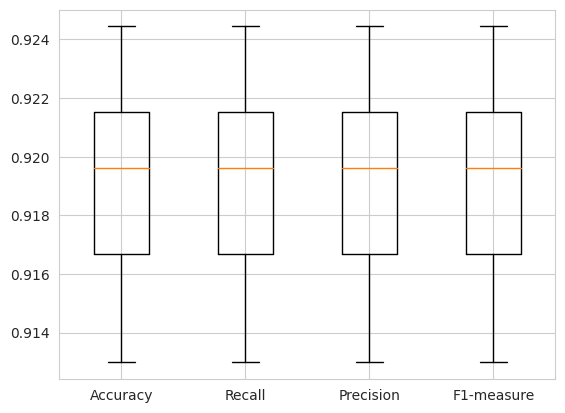

In [75]:
data = [knn1_accurecy, knn1_recall, knn1_precision, knn1_f1_score]

plt.boxplot(data,labels = ['Accuracy','Recall','Precision','F1-measure'])
plt.show()

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

dt1_accuracy = []
dt1_precision = []
dt1_recall = []
dt1_f1_score = []

for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    # Create Decision Tree classifier object
    dt_classifier = DecisionTreeClassifier()

    # Train Decision Tree Classifier
    dt_classifier.fit(X_train, y_train)

    # Predict the response for the test dataset
    y_pred = dt_classifier.predict(X_test)

    # Store the metrics for each iteration
    dt1_accuracy.append(accuracy_score(y_test, y_pred))
    dt1_precision.append(precision_score(y_test, y_pred, average='weighted'))
    dt1_recall.append(recall_score(y_test, y_pred, average='weighted'))
    dt1_f1_score.append(f1_score(y_test, y_pred, average='weighted'))

    print("Iteration:", i+1)
    print("Accuracy:", dt1_accuracy[-1])
    print("Precision:", dt1_precision[-1])
    print("Recall:", dt1_recall[-1])
    print("F1_score:", dt1_f1_score[-1])
    print("*************************************************************************************")

print('=========================================================')
print('Average Accuracy:', np.mean(dt1_accuracy))
print('Average Recall:', np.mean(dt1_recall))
print('Average Precision:', np.mean(dt1_precision))
print('Average F1-Score:', np.mean(dt1_f1_score))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Iteration: 1
Accuracy: 0.9908683974932856
Precision: 0.9925485770498604
Recall: 0.9908683974932856
F1_score: 0.9916859409873586
*************************************************************************************
Iteration: 2
Accuracy: 0.9917636526410026
Precision: 0.9930226777410505
Recall: 0.9917636526410026
F1_score: 0.9923896171516955
*************************************************************************************


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Iteration: 3
Accuracy: 0.9905102954341988
Precision: 0.9928258183264544
Recall: 0.9905102954341988
F1_score: 0.9916644995891899
*************************************************************************************
Iteration: 4
Accuracy: 0.990152193375112
Precision: 0.9899738510671562
Recall: 0.990152193375112
F1_score: 0.9900629495434989
*************************************************************************************


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Iteration: 5
Accuracy: 0.991047448522829
Precision: 0.9908705731849374
Recall: 0.991047448522829
F1_score: 0.9909589133806198
*************************************************************************************
Iteration: 6
Accuracy: 0.9903312444046554
Precision: 0.9907070447584613
Recall: 0.9903312444046554
F1_score: 0.990518586954342
*************************************************************************************


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Iteration: 7
Accuracy: 0.9908683974932856
Precision: 0.9931025956949076
Recall: 0.9908683974932856
F1_score: 0.9919717103984101
*************************************************************************************
Iteration: 8
Accuracy: 0.9894359892569382
Precision: 0.9903266906304864
Recall: 0.9894359892569382
F1_score: 0.9898811132969568
*************************************************************************************


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Iteration: 9
Accuracy: 0.9883616830796778
Precision: 0.9907654809379987
Recall: 0.9883616830796778
F1_score: 0.9895464877606868
*************************************************************************************
Iteration: 10
Accuracy: 0.9912264995523724
Precision: 0.9919383775165191
Recall: 0.9912264995523724
F1_score: 0.9915822310787702
*************************************************************************************


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Iteration: 11
Accuracy: 0.9899731423455684
Precision: 0.9898023541662448
Recall: 0.9899731423455684
F1_score: 0.9898838905391032
*************************************************************************************
Iteration: 12
Accuracy: 0.992300805729633
Precision: 0.9898138896173029
Recall: 0.992300805729633
F1_score: 0.9910545256656873
*************************************************************************************
Iteration: 13
Accuracy: 0.9903312444046554
Precision: 0.99123006174087
Recall: 0.9903312444046554
F1_score: 0.9907771225208639
*************************************************************************************
Iteration: 14
Accuracy: 0.9912264995523724
Precision: 0.9919467856075352
Recall: 0.9912264995523724
F1_score: 0.9915850726799607
*************************************************************************************


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Iteration: 15
Accuracy: 0.9892569382273948
Precision: 0.9908581784833067
Recall: 0.9892569382273948
F1_score: 0.99005580474592
*************************************************************************************
Iteration: 16
Accuracy: 0.9905102954341988
Precision: 0.9919793874700237
Recall: 0.9905102954341988
F1_score: 0.9912416275784676
*************************************************************************************


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Iteration: 17
Accuracy: 0.9914055505819158
Precision: 0.9931926706257723
Recall: 0.9914055505819158
F1_score: 0.9922971988614733
*************************************************************************************
Iteration: 18
Accuracy: 0.9899731423455684
Precision: 0.9913035682970067
Recall: 0.9899731423455684
F1_score: 0.9906175160495575
*************************************************************************************


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Iteration: 19
Accuracy: 0.988898836168308
Precision: 0.9935342514528912
Recall: 0.988898836168308
F1_score: 0.9912092000840612
*************************************************************************************
Iteration: 20
Accuracy: 0.99319606087735
Precision: 0.9933747020619044
Recall: 0.99319606087735
F1_score: 0.9932853686931157
*************************************************************************************


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Iteration: 21
Accuracy: 0.9908683974932856
Precision: 0.9910574493939598
Recall: 0.9908683974932856
F1_score: 0.9909598976831494
*************************************************************************************
Iteration: 22
Accuracy: 0.989794091316025
Precision: 0.9942533320501054
Recall: 0.989794091316025
F1_score: 0.9920181681408115
*************************************************************************************


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Iteration: 23
Accuracy: 0.992300805729633
Precision: 0.9926580012405256
Recall: 0.992300805729633
F1_score: 0.9924784216128923
*************************************************************************************
Iteration: 24
Accuracy: 0.9885407341092212
Precision: 0.9912927510488119
Recall: 0.9885407341092212
F1_score: 0.9898950883161138
*************************************************************************************


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Iteration: 25
Accuracy: 0.9919427036705462
Precision: 0.9923008788866379
Recall: 0.9919427036705462
F1_score: 0.9921188382313518
*************************************************************************************
Iteration: 26
Accuracy: 0.9915846016114592
Precision: 0.9908720753325543
Recall: 0.9915846016114592
F1_score: 0.991228200582926
*************************************************************************************


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Iteration: 27
Accuracy: 0.9946284691136974
Precision: 0.9967734698968227
Recall: 0.9946284691136974
F1_score: 0.9956998025860351
*************************************************************************************
Iteration: 28
Accuracy: 0.9914055505819158
Precision: 0.9914044550092103
Recall: 0.9914055505819158
F1_score: 0.9914046949908104
*************************************************************************************
Iteration: 29
Accuracy: 0.989794091316025
Precision: 0.9919326546472915
Recall: 0.989794091316025
F1_score: 0.9908577112029241
*************************************************************************************
Iteration: 30
Accuracy: 0.9894359892569382
Precision: 0.9878387070520377
Recall: 0.9894359892569382
F1_score: 0.9886355877405957
*************************************************************************************
Average Accuracy: 0.9907311250373023
Average Recall: 0.9907311250373023
Average Precision: 0.991783377032955
Average F1-Score: 0.9912521929549

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


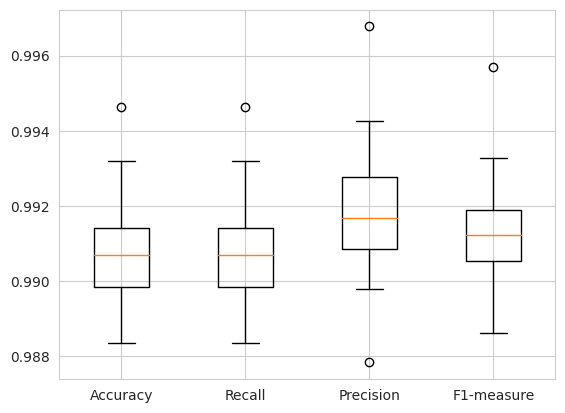

In [77]:
data = [dt1_accuracy,dt1_recall,dt1_precision,dt1_f1_score]
plt.boxplot(data,labels = ['Accuracy','Recall','Precision','F1-measure'])
plt.show()

In [78]:
from sklearn.linear_model import LogisticRegression

Lr_accurecyy = []
Lr_precisionn = []
Lr_recalll = []
Lr_f1_scoree = []

for i in range(30):
  X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2,random_state = i)

  # Initialize the Logistic Regression model
  logistic_regression = LogisticRegression()

  # Training the Logistic Regression model on the training data
  logistic_regression.fit(X_train, y_train)

  # Now you can use the trained Logistic Regression model to make predictions on the test data
  y_pred= logistic_regression.predict(X_test)

  # printing accuracy
  Lr_accurecy = accuracy_score(y_test,y_pred)
  Lr_accurecyy.append(Lr_accurecy)
  print("Accuracy: ",accuracy_score(y_test,y_pred))
  # printing precision
  Lr_precision = precision_score(y_test,y_pred,average='weighted')
  Lr_precisionn.append(Lr_precision)
  print("Precision: ",precision_score(y_test,y_pred,average='weighted'))
  # printing recall
  Lr_recall = recall_score(y_test,y_pred,average='weighted')
  Lr_recalll.append(Lr_recall)
  print("Recall: ",recall_score(y_test,y_pred,average='weighted'))
  # printing f1 score
  Lr_f1_score = f1_score(y_test,y_pred,average='weighted')
  Lr_f1_scoree.append(Lr_f1_score)
  print("F1_score: ",f1_score(y_test,y_pred,average='weighted'))
  print("****************************************************************************")

def getAvg(measure):
  sum = 0
  for i in measure:
    sum += i
  return sum/30
print('=========================================================')
print('Average Accuracy:', getAvg(Lr_accurecyy))
print('Average Recall:', getAvg(Lr_recalll))
print('Average Precision:', getAvg(Lr_precisionn))
print('Average F1-Score:', getAvg(Lr_f1_scoree))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Us

Accuracy:  0.7772605192479857
Precision:  0.7709517030572689
Recall:  0.7772605192479857
F1_score:  0.7718349321392775
****************************************************************************


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Us

Accuracy:  0.7652641002685765
Precision:  0.7581418450570878
Recall:  0.7652641002685765
F1_score:  0.7583875058692697
****************************************************************************


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Us

Accuracy:  0.7718889883616831
Precision:  0.7666454067416518
Recall:  0.7718889883616831
F1_score:  0.7667292971447955
****************************************************************************


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Us

Accuracy:  0.7708146821844225
Precision:  0.7646289782510897
Recall:  0.7708146821844225
F1_score:  0.7653235476129526
****************************************************************************


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Us

Accuracy:  0.7566696508504924
Precision:  0.7504583338987851
Recall:  0.7566696508504924
F1_score:  0.7478666646534992
****************************************************************************


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Us

Accuracy:  0.7795881826320501
Precision:  0.7735235661076314
Recall:  0.7795881826320501
F1_score:  0.7739708525274843
****************************************************************************


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Us

Accuracy:  0.7743957027752909
Precision:  0.7694241132257168
Recall:  0.7743957027752909
F1_score:  0.7698163445101295
****************************************************************************


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Us

Accuracy:  0.767591763652641
Precision:  0.7610933997497189
Recall:  0.767591763652641
F1_score:  0.7625384914371823
****************************************************************************


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Us

Accuracy:  0.7724261414503133
Precision:  0.7665104327305073
Recall:  0.7724261414503133
F1_score:  0.7681142236746383
****************************************************************************


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Us

Accuracy:  0.7686660698299015
Precision:  0.7621922965279683
Recall:  0.7686660698299015
F1_score:  0.7630496560172751
****************************************************************************


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Us

Accuracy:  0.7715308863025963
Precision:  0.7646136421400527
Recall:  0.7715308863025963
F1_score:  0.7660344968696192
****************************************************************************


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Us

Accuracy:  0.7767233661593554
Precision:  0.7688447527158735
Recall:  0.7767233661593554
F1_score:  0.7712633578444957
****************************************************************************


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Us

Accuracy:  0.7752909579230081
Precision:  0.7691233409691877
Recall:  0.7752909579230081
F1_score:  0.7700679347177782
****************************************************************************


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Us

Accuracy:  0.7774395702775291
Precision:  0.7716130865618449
Recall:  0.7774395702775291
F1_score:  0.7724211458230745
****************************************************************************


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Us

Accuracy:  0.7611459265890779
Precision:  0.7546354495041183
Recall:  0.7611459265890779
F1_score:  0.7546205099069335
****************************************************************************


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Us

Accuracy:  0.7722470904207699
Precision:  0.7656586035218131
Recall:  0.7722470904207699
F1_score:  0.7670067238504689
****************************************************************************


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Us

Accuracy:  0.7658012533572068
Precision:  0.7591820634840218
Recall:  0.7658012533572068
F1_score:  0.7601247313874682
****************************************************************************


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Us

Accuracy:  0.7742166517457475
Precision:  0.7679473692401176
Recall:  0.7742166517457475
F1_score:  0.7701686660426721
****************************************************************************


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Us

Accuracy:  0.7543419874664279
Precision:  0.7491740357936059
Recall:  0.7543419874664279
F1_score:  0.7424914709599091
****************************************************************************


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Us

Accuracy:  0.7745747538048344
Precision:  0.7687571995618288
Recall:  0.7745747538048344
F1_score:  0.7680989625600823
****************************************************************************


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Us

Accuracy:  0.7840644583706357
Precision:  0.7806754261086818
Recall:  0.7840644583706357
F1_score:  0.7822882495792128
****************************************************************************


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Us

Accuracy:  0.7806624888093107
Precision:  0.7756711037941598
Recall:  0.7806624888093107
F1_score:  0.7771654083878582
****************************************************************************


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Us

Accuracy:  0.7661593554162937
Precision:  0.7599270735047177
Recall:  0.7661593554162937
F1_score:  0.7590667051916883
****************************************************************************


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Us

Accuracy:  0.7717099373321397
Precision:  0.7645858827740138
Recall:  0.7717099373321397
F1_score:  0.7650038172119371
****************************************************************************


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Us

Accuracy:  0.7672336615935542
Precision:  0.7615298706063898
Recall:  0.7672336615935542
F1_score:  0.7618039964173725
****************************************************************************


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Us

Accuracy:  0.7670546105640107
Precision:  0.7592433857706666
Recall:  0.7670546105640107
F1_score:  0.7604056710686808
****************************************************************************


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Us

Accuracy:  0.7751119068934647
Precision:  0.7701549426961999
Recall:  0.7751119068934647
F1_score:  0.7697286326849426
****************************************************************************


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Us

Accuracy:  0.7738585496866607
Precision:  0.7671734837898183
Recall:  0.7738585496866607
F1_score:  0.7676065927539085
****************************************************************************


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Us

Accuracy:  0.762041181736795
Precision:  0.7563904296256012
Recall:  0.762041181736795
F1_score:  0.7539267948720711
****************************************************************************
Accuracy:  0.7858549686660699
Precision:  0.7781577185439972
Recall:  0.7858549686660699
F1_score:  0.7806242153505972
****************************************************************************
Average Accuracy: 0.7713876454789614
Average Recall: 0.7713876454789614
Average Precision: 0.7652209645351378
Average F1-Score: 0.7655849866355758


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Us

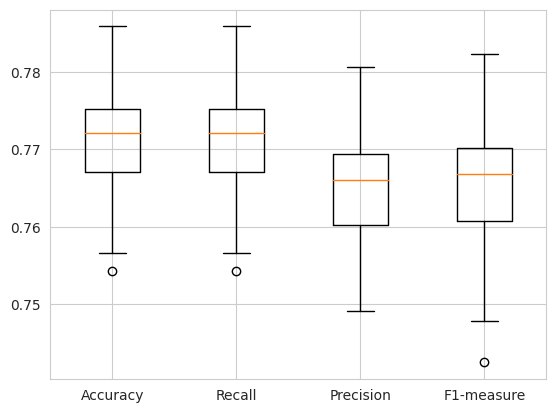

In [79]:
data = [Lr_accurecyy, Lr_recalll, Lr_precisionn,Lr_f1_scoree]
plt.boxplot(data,labels = ['Accuracy','Recall','Precision','F1-measure'])
plt.show()

In [80]:
bar_acc = [np.mean(knn1_accurecy),np.mean(dt1_accuracy),np.mean(Lr_accurecyy)]
bar_pre = [np.mean(knn1_precision),np.mean(dt1_precision),np.mean(Lr_precisionn)]
bar_rec = [np.mean(knn1_recall),np.mean(dt1_recall),np.mean(Lr_recalll)]
bar_f1 =  [np.mean(knn1_f1_score),np.mean(dt1_f1_score),np.mean(Lr_f1_scoree)]

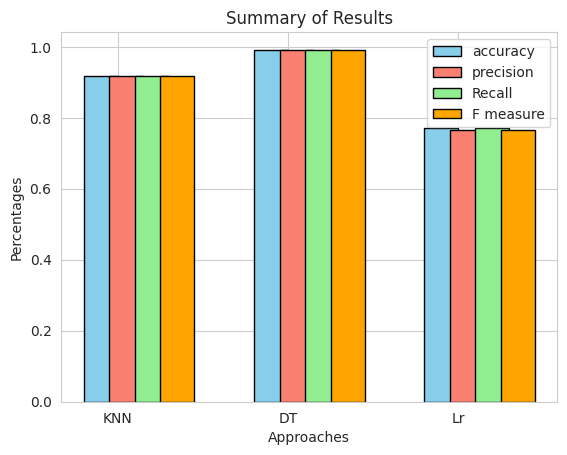

In [81]:
Approaches = ["KNN",'DT',"Lr"]
X_axis = np.arange(len(Approaches ))

plt.bar(X_axis + 0.15, bar_acc, color ='skyblue', width = 0.20, edgecolor = 'black', label = 'accuracy')
plt.bar(X_axis + 0.30, bar_pre, color ='salmon', width = 0.20, edgecolor = 'black', label = 'precision')
plt.bar(X_axis + 0.45, bar_rec, color ='lightgreen', width = 0.20, edgecolor = 'black', label = 'Recall')
plt.bar(X_axis + 0.60, bar_f1, color ='orange', width = 0.20, edgecolor = 'black', label = 'F measure')


plt.xticks(X_axis+0.25, Approaches)
plt.legend(bbox_to_anchor=(1, 1))

plt.xlabel("Approaches")
plt.ylabel("Percentages")
plt.title("Summary of Results")
plt.show()